# Artificial Intelligence
# 464/664
# Assignment #4

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested (it is your responsibility to make sure notebook looks as expected on Gradescope),
03. Each helper function should be preceeded by documentation (Markdown cell),
04. No comments in the code; anything worth mentioning should be included in the documentation,
05. Use descriptive variable names,
06. Functions should do only one thing,
07. Check submission deadline on Gradescope, 
08. Rename the file to Last_First_assignment_4, 
09. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
10. Do not submit any other files.

## Directions _not_ applicable for this Assignment:
* Do not use classes,
* Keep functions to 20 lines or less (including empty lines so do not add any),
* Each helper function should be followed by three assert-style unit tests.

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

You might need to do a install to work with networkx

```
pip install networkx
```

## Map Coloring

It turns out that any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors (see [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem), for more details) This **Constraint Satisfaction Problem** can be viewed as a constraint graph, where variables are nodes and no adjacent nodes can be of the same color.


Our first constraint graph is the dictionary `connecticut_graph` with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.

In [2]:
connecticut_graph = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut_graph)

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


<a id="Node"></a>
# Node

The `Node` class represents a single node in a graph, defined by its unique number, name, neighboring nodes, coordinates, and a set of valid colors for coloring algorithms. Each node can be connected to other nodes and has properties to track its position and other metadata.

### Parameters:
* **number** `int`: A unique identifier for the node.
* **name** `str`: A descriptive name or label for the node.
* **neighbors** `List[int]`: A list of node numbers that are neighbors (i.e., connected to this node).
* **coordinates** `Tuple[int, int]`: A tuple representing the (x, y) coordinates of the node in a 2D space.
* **valid_colors** `List[str]`: A list of valid color options that can be assigned to this node, typically used in graph coloring algorithms.

### Attributes:
* **number** `int`: The unique identifier for the node.
* **name** `str`: The name or label for the node.
* **neighbors** `List[int]`: A list of neighboring node numbers that are connected to this node.
* **coordinates** `Tuple[int, int]`: The (x, y) coordinates of the node in a 2D space.
* **valid_colors** `List[str]`: A list of valid colors that can be assigned to this node, often used in algorithms where nodes must be colored without conflicting with their neighbors.

### Methods:

---

<a id="node_constructor"></a>
### `__init__(number, name, neighbors, coordinates, valid_colors)`

Initializes the node with the specified number, name, neighbors, coordinates, and valid colors.

* **number** `int`: The unique identifier for the node.
* **name** `str`: The name or label for the node.
* **neighbors** `List[int]`: The list of node numbers that are neighbors of this node.
* **coordinates** `Tuple[int, int]`: The coordinates of the node in a 2D space.
* **valid_colors** `List[str]`: A list of valid color options for this node.

**returns** None.

---

<a id="node_str"></a>
### `__str__()`

Returns a string representation of the node, displaying its number, name, neighbors, coordinates, and valid colors.

**returns** `str`: A formatted string representing the node.

Example output:  
`[number, name, neighbors, coordinates, valid_colors]`


In [3]:
class Node:
    def __init__(self, number, name, neighbors, coordinates, valid_colors):
        self.number = number
        self.name = name
        self.neighbors = neighbors
        self.coordinates = coordinates
        self.valid_colors = valid_colors
        self.invalid_colors = []
        self.color = None
    
    def invalidate_all_colors(self):
        for valid_color in valid_colors:
            self.invalidate_color(valid_color, self)
        
    def invalidate_color(self, color, invalidator):
        if color in self.valid_colors:
            self.valid_colors.remove(color)
        if not color in self.invalid_colors:
            self.invalid_colors.append((color, invalidator))
        
    def __str__(self):
        return f'[{self.number}, {self.name}, {self.neighbors}, {self.coordinates}, {self.valid_colors}, {self.invalid_colors}, {self.color}]'

<a id="Graph"></a>
# Graph

The `Graph` class represents a graph structure consisting of nodes, edges, and coordinates. It is used to model a network or structure where nodes are connected by edges, and each node has specific coordinates in a space.

### Parameters:
* **nodes** `List`: A list of nodes in the graph. Each node represents an individual element in the graph.
* **edges** `List[Tuple[int, int]]`: A list of tuples where each tuple represents an edge between two nodes. Each tuple contains two elements, corresponding to the indices of the connected nodes.
* **coordinates** `List[Tuple[int, int]]`: A list of tuples where each tuple represents the coordinates of a node in a 2D space, with each tuple containing the x and y coordinates of the respective node.

### Attributes:
* **nodes** `List`: The list of nodes that make up the graph.
* **edges** `List[Tuple[int, int]]`: A list of edges, where each tuple connects two nodes by their indices.
* **coordinates** `List[Tuple[int, int]]`: A list of coordinates for each node, with each tuple representing the (x, y) position of a node in a 2D space.

### Methods:

This class does not have any additional public methods beyond the constructor.


In [4]:
class Graph:
    def __init__(self, graph, color_options, trace=False):
        self.__color_options = color_options
        self.nodes = self.__initialize_nodes(graph, trace)
        
    def __initialize_nodes(self, graph, trace=False):
        nodes = []
        if trace:
            print("Initializing Graph Nodes with all specified color options")
        for i in range(len(graph["nodes"])):
            neighbors = []
            for edge in graph["edges"]:
                if edge[0] == i and not edge[1] == i:
                    neighbors.append(edge[1])
                elif edge[1] == i and not edge[0] == i:
                    neighbors.append(edge[0])
            nodes.append(Node(i, graph["nodes"][i], neighbors, graph["coordinates"][i], deepcopy(self.__color_options)))
        return nodes
        
    def get_degree(self, node_number):
        return len(self.nodes[node_number].neighbors)
    
    def get_degree_heuristic_order(self, trace=False):
        if trace:
            print("Sorting nodes by decreasing order of degree")
        return sorted(self.nodes, key=lambda node: -len(node.neighbors))
    
    def get_least_constrained_values_order(self, node):
        shared_list = {}
        for color in node.valid_colors:
            shared_list[color] = 0
            for neighbor_number in node.neighbors:
                if color in self.nodes[neighbor_number].valid_colors:
                    shared_list[color] = shared_list[color] + 1
        if len(shared_list) > 0:
            return sorted(shared_list.items(), key=lambda item: item[1])  
        return []
    
    def blocked_uncolored_neighbor(self, node):
        for neighbor_number in node.neighbors:
            neighbor = self.nodes[neighbor_number]
            if neighbor.color == None and len(neighbor.valid_colors) == 0:
                return True
        return False
    
    def forward_checking(self, curr_node, color, trace):
        if trace: print('Forward checking by invalidating neighbor\'s color')
        for neighbor_number in curr_node.neighbors:
            if trace: print('Invalidating neighbor', neighbor_number, 'color', color)
            neighbor = self.nodes[neighbor_number]
            neighbor.invalidate_color(color, curr_node)

    def collapsed(self):
        return [(node.name, node.color) for node in self.nodes]
    
    def __str__(self):
        string = "Nodes:\n"
        for node in self.nodes:
            string = string + node.__str__() + '\n'
        return string     
        

# TEST SANDBOX

In [5]:
test_graph = { "nodes": ["New York", "Arkansas", "Maryland", "Texas"],
                "edges": [(0,1), (1,3), (2,1), (2,3)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142)]}

test_fail_graph = { "nodes": ["New York", "Arkansas", "Maryland"],
                "edges": [(0,1), (0,2), (1,2)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142)]}


# test_graph_object = Graph(test_graph, ["red", "blue", "green", "yellow"])
# print(test_graph_object)


# NEW_test_graph_object = deepcopy(test_graph_object)

# NEW_test_graph_object.nodes[0].invalidate_color("red", None)
# NEW_test_graph_object.nodes[0].invalidate_color("blue", None)
# NEW_test_graph_object.nodes[1].invalidate_color("blue", None)
# NEW_test_graph_object.nodes[1].invalidate_color("yellow", None)
# print(NEW_test_graph_object)

# # print intial graph 
# print("INITIAL graph object", test_graph_object, '\n')

# # Artificially remove constraints
# test_graph_object.nodes[0].invalidate_color("red", None)
# test_graph_object.nodes[0].invalidate_color("blue", None)
# test_graph_object.nodes[1].invalidate_color("blue", None)
# test_graph_object.nodes[1].invalidate_color("yellow", None)
# test_graph_object.nodes[2].invalidate_color("green", None)
# test_graph_object.nodes[2].invalidate_color("yellow", None)
# test_graph_object.nodes[3].invalidate_color("green", None)
# test_graph_object.nodes[3].invalidate_color("red", None)
# test_graph_object.nodes[3].invalidate_color("blue", None)

# # Printing new graph
# print("NEW graph object", test_graph_object, '\n')

# order = test_graph_object.get_least_constrained_values_order(1)
# print(order)

## backtrack

The `backtrack` function implements a recursive backtracking algorithm to assign colors to nodes in a graph, such that no two adjacent nodes have the same color. It explores all possible color assignments for each node while using forward checking to prune invalid color assignments. The function proceeds depth-first through the ordered list of nodes, attempting to assign colors and backtracking if conflicts are detected.

### Parameters:
* **graph** `Graph`: The graph object containing the nodes and edges. Each node should have a list of valid colors, and the function modifies the graph by assigning colors to nodes.
* **ordered_nodes** `List[Node]`: A list of nodes in the order they should be processed. The order is typically based on some criteria (e.g., degrees, constraints).
* **depth** `int`: The current depth of the recursion, representing the index of the node being colored in the ordered list.
* **total_nodes** `int`: The total number of nodes in the graph that need to be colored.
* **trace** `bool` (optional): If `True`, prints debug information at each step of the recursion to trace the execution of the algorithm. Defaults to `False`.

### Returns:
* **Graph or None**: If a valid coloring is found, the modified `Graph` object with colored nodes is returned. If no valid coloring is possible, `None` is returned, indicating failure to color the graph under the given constraints.

### How it works:
1. **Base Case**: When the depth reaches `total_nodes`, all nodes have been successfully colored, and the graph is returned.
2. **Deep Copying**: The function creates a deep copy of the graph to explore possible color assignments without modifying the original graph.
3. **Get Current Node**: The current node at the given depth is retrieved from the ordered list of nodes.
4. **Least Constrained Value**: The function retrieves a list of possible colors for the current node, ordered by how constrained the color is (using the least constrained value heuristic).
5. **Assign Color**: For each color in the list, the function attempts to assign the color to the node.
6. **Forward Checking**: The function invalidates the assigned color for the node's neighbors to avoid conflicts.
7. **Recursive Call**: The function recursively calls itself to color the next node. If successful, the result is returned.
8. **Backtracking**: If no valid coloring is found at a certain depth, the function restores the original graph and attempts a different color.
9. **Termination**: If all possible color assignments for a node lead to conflicts, the function backtracks and returns `None`.

### Example:

```python
# Assuming a graph object with nodes and an ordered list of nodes
result = backtrack(graph, ordered_nodes, 0, total_nodes, trace=True)
if result:
    print("Graph successfully colored!")
else:
    print("No valid coloring found.")


In [6]:
def backtrack(graph, ordered_nodes, depth, total_nodes, trace=False):
    
    if depth >= total_nodes:
        if trace: print('Base case satisfied!')
        return graph
    
    if trace: print('Finding color of node at graph depth', depth)
    saved_graph = deepcopy(graph)
    
    
    if trace: print('Getting node for current graph depth')
    curr_node = saved_graph.nodes[ordered_nodes[depth].number]
    
    for color, num_shared in saved_graph.get_least_constrained_values_order(curr_node):

        if trace: print('Checking color', color, 'for depth', depth, '(node):', curr_node)
        curr_node.color = color

        
        saved_graph.forward_checking(curr_node, color, trace)
        

        if trace: print('Finding next result for updated graph')
        result = backtrack(deepcopy(saved_graph), deepcopy(ordered_nodes), depth + 1, total_nodes)

        if not result == None:
            return result

        if trace: print('Restoring original graph')
        saved_graph = deepcopy(graph)
        curr_node = saved_graph.nodes[ordered_nodes[depth].number]
        
    return None


<a id="color_map"></a>
## color_map

This function colors a map provided as a constraint graph. The inputs are the constraint graph and a list of colors. Implementation should feature: 1) Backtracking, 2) Forward Checking, 3) variables picked using the Degreee Heuristic, and 4) Values picked using the Least Constrained Values heuristic. Each feature should be its own helper function, documented and tested.  

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **color_list** List: the domain available to variables at the start of the CSP.
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features)


**returns** 


* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples, where the ordering matches the original ordering of nodes in the constraint_graph. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`If the CSP cannot find a solution, `None` is returned.

In [7]:
def color_map(constraint_graph, color_list, trace=False):
    
    graph_object = Graph(constraint_graph, color_list, trace)
    
    ordered_nodes = graph_object.get_degree_heuristic_order(trace)
    
    colored_graph_object = backtrack(deepcopy(graph_object), deepcopy(ordered_nodes), 0, len(graph_object.nodes), trace)
    
    if not colored_graph_object == None:
        return [(node.name, node.color) for node in colored_graph_object.nodes]
    
    return None
    
    
    # Fix. Everything is colored red right now. 
    # With your implementation, if a solution can't be found, it should return `None`.
    # Add features: 
    # 1) Backtracking, 
    # 2) Forward Checking, 
    # 3) Variables picked using the Degreee Heuristic, and 
    # 4) Values picked using the Least Constrained Values heuristic. 
    # Features should be helper functions, documented and tested.
    
    
    
    
#     return [(n, "red") for n in constraint_graph["nodes"]]

<a id="color_map"></a>
## test_coloring

This function tests the solution resulting from `color_map`. Adjacent nodes in the solution cannot be of the same color.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples


**returns** 


Warning statement if there's a violation.

In [8]:
def test_coloring(constraint_graph, solution):
    nodes = constraint_graph[ "nodes"]
    edges = constraint_graph["edges"]
    for start, end in edges:
        try:
            assert solution[start][1] != solution[end][1]
        except AssertionError:
            print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

<a id="draw_map"></a>
## draw_map

This function uses Networkx to draw the `constraint_graph`. Nodes are colored using `solution`. 

* **title** Str: Title for the cartoon
* **constraint_graph** Dict with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.
* **size** Tuple[Int, Int]: inches wide x inches tall, so (8,10) results in 8"x10" rendering (depends on monitor)
* **solution** List[Tuple[Str][Str]]]: list of color assignments. Each item in the list is a (node name, assigned color) tuple. If set to None, all nodes are colored red. 


**returns** 

None. Draws constraint graph with specified color assignments for nodes. 

In [9]:
def draw_map(title, constraint_graph, size, solution=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(constraint_graph["nodes"])
    pos = as_dictionary(constraint_graph["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(constraint_graph["nodes"]))]

    if solution:
        colors = [c for n, c in solution]
    else:
        colors = ['red' for c in range(0,len(constraint_graph["nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(constraint_graph["edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(title)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

## Problem 1. Color Connecticut with Four Colors

In [10]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green", "yellow"], trace=True)

Initializing Graph Nodes with all specified color options
Sorting nodes by decreasing order of degree
Finding color of node at graph depth 0
Getting node for current graph depth
Checking color red for depth 0 (node): [3, Hartford, [1, 2, 4, 5, 6], (123, 142), ['red', 'blue', 'green', 'yellow'], [], None]
Forward checking by invalidating neighbor's color
Invalidating neighbor 1 color red
Invalidating neighbor 2 color red
Invalidating neighbor 4 color red
Invalidating neighbor 5 color red
Invalidating neighbor 6 color red
Finding next result for updated graph


## Test Connecticut Solution

In [11]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

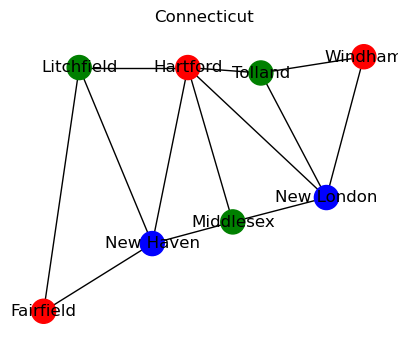

In [12]:
if connecticut_solution:
    draw_map("Connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 2. Color Connecticut with Three Colors

In [13]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green"], trace=True)

Initializing Graph Nodes with all specified color options
Sorting nodes by decreasing order of degree
Finding color of node at graph depth 0
Getting node for current graph depth
Checking color red for depth 0 (node): [3, Hartford, [1, 2, 4, 5, 6], (123, 142), ['red', 'blue', 'green'], [], None]
Forward checking by invalidating neighbor's color
Invalidating neighbor 1 color red
Invalidating neighbor 2 color red
Invalidating neighbor 4 color red
Invalidating neighbor 5 color red
Invalidating neighbor 6 color red
Finding next result for updated graph


## Test Connecticut Solution

In [14]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

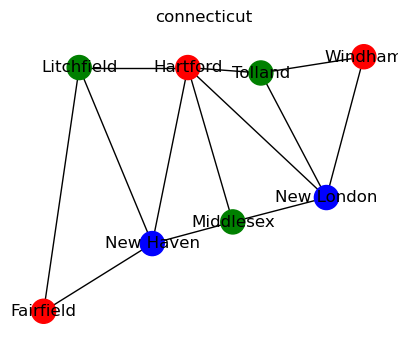

In [15]:
if connecticut_solution:
    draw_map("connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 3. Color Europe with Four Colors

In [16]:
europe_graph = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe_graph)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [ ]:
europe_solution = color_map(europe_graph, ["red", "blue", "green", "yellow"], trace=False)

## Test Europe Solution

In [ ]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

In [ ]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 4. Color Europe with Three Colors

In [ ]:
europe_solution = color_map(europe_graph, ["red", "blue", "green"], trace=False)

## Test Europe Solution

In [ ]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

In [ ]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 5. OPTIONAL. BONUS. Color Europe with Four Colors. 

Re-do Problem #3 (Color, Test, and Draw Europe with four colors) but instead of picking variables using the Degreee Heuristic, use the Minimum Remaining Values. 

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".